## Preprocess

In [1]:
!pip install datasets transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 KB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 89.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 85.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 10.2 MB/s eta 0:00:00


In [2]:
root_dir = "/content/drive/Othercomputers/Mac/Mila/Winter_2023/ift6759_project/"

%matplotlib inline
%load_ext autoreload
%autoreload 2

from google.colab import drive
import sys

drive.mount('/content/drive')
sys.path.append(root_dir)

Mounted at /content/drive


In [3]:
from torchvision import transforms

# Define transforms from @Shawn regression
transform = transforms.Compose([
    transforms.RandomRotation(30),      # rotate +/- 30 degrees
    transforms.RandomHorizontalFlip(),  # rHorizontally flip the given image randomly with a given probability (default p=0.5)
    transforms.RandomAutocontrast(p=0.5),
    transforms.RandomEqualize(p=0.5),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
])

In [4]:
from covidSeverityDataset import CovidSeverityDataset

dataset = CovidSeverityDataset(root_dir, transform=transform, task="regression")
train_dataset, val_dataset, test_dataset = dataset.get_subsets()

In [5]:
def get_num_labels(task):
  if task == "classification":
    return 7
  elif task == "regression":
    return 1

# Exploratory data visualization



In [ ]:
res = []
for batch in train_dataset:
  _, labels = batch
  res = [*res, *labels] 

KeyboardInterrupt: ignored

In [ ]:
result = [tensor.item() for tensor in res]

In [ ]:
print(result)

[4, 2, 4, 5, 5, 2, 4, 2, 3, 4, 3, 4, 2, 4, 1, 3, 2, 4, 3, 3, 3, 5, 5, 4, 5, 0, 1, 2, 2, 4, 1, 4, 1, 2, 4, 3, 2, 3, 5, 2, 4, 4, 4, 2, 3, 4, 3, 2, 4, 3, 3, 3, 4, 2, 4, 5, 1, 2, 3, 5, 1, 3, 3, 4, 2, 3, 5, 4, 3, 4, 2, 3, 3, 2, 0, 3, 4, 4, 5, 4, 5, 2, 0, 3, 4, 3, 3, 5, 2, 1, 3, 3, 5, 3, 4, 2, 1, 3, 4, 0, 3, 4, 1, 4, 1, 3, 4, 2, 0, 1, 2, 4, 2, 2, 3, 3, 2, 4, 3, 5, 3, 4, 3, 4, 0, 3, 3, 5, 1, 3, 3, 1, 3, 2, 4, 3, 3, 4, 0, 1, 4, 6, 3, 3, 3, 2, 3, 2, 4, 4, 5, 4, 4, 5, 1, 4, 4, 4, 3, 4, 4, 1, 2, 3, 1, 4, 1, 3, 3, 3, 3, 2, 5, 2, 1, 3, 1, 3, 4, 3, 5, 5, 2, 2, 3, 4, 4, 4, 4, 3, 3, 4, 3, 3, 2, 1, 3, 1, 4, 3, 3, 2, 4, 4, 2, 4, 4, 4, 3, 2, 1, 2, 4, 3, 2, 3, 1, 5, 5, 1, 3, 2, 4, 2, 4, 3, 3, 3, 3, 3, 4, 3, 3, 5, 4, 4, 4, 3, 2, 3, 3, 1, 4, 4, 3, 1, 2, 2, 4, 2, 4, 2, 4, 5, 4, 4, 3, 2, 1, 1, 1, 2, 0, 3, 3, 3, 4, 4, 2, 3, 2, 3, 3, 2, 3, 5, 4, 5, 1, 4, 4, 2, 3, 2, 3, 6, 5, 3, 4, 3, 4, 1, 3, 1, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 1, 2, 2, 4, 2, 2, 1, 4, 2, 4, 4, 5, 3, 2, 2, 3, 3, 5, 4, 3, 4, 2, 1, 2, 3, 2, 2, 

In [ ]:
import matplotlib.pyplot as plt

plt.hist(result, bins=7)  
plt.xlabel('Data train');

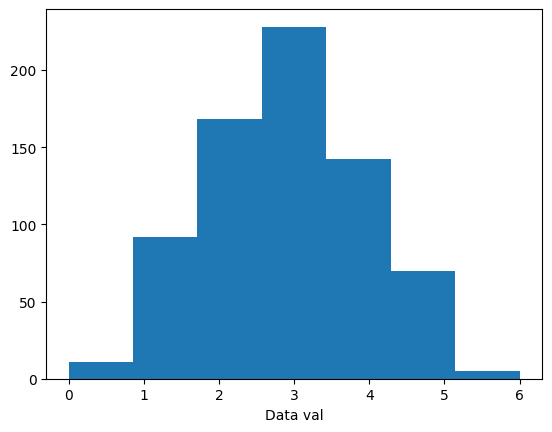

In [ ]:
import matplotlib.pyplot as plt

plt.hist(result, bins=7)  
plt.xlabel('Data val');

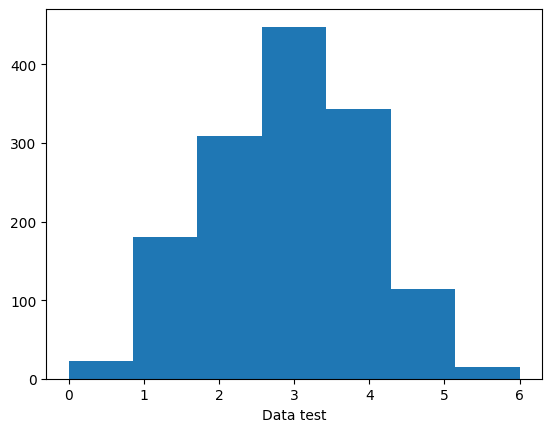

In [ ]:
import matplotlib.pyplot as plt

plt.hist(result, bins=7)  
plt.xlabel('Data test');

In [ ]:
df = dataset.dataframe["OpacityScoreGlobal"]
df.plot.hist(bins=7, alpha=0.5)

# Train

In [6]:
import torch

def to_device(tensors, device):
    if isinstance(tensors, torch.Tensor):
        return tensors.to(device=device)
    elif isinstance(tensors, dict):
        return dict(
            (key, to_device(tensor, device)) for (key, tensor) in tensors.items()
        )
    elif isinstance(tensors, list):
        return list(
            (to_device(tensors[0], device), to_device(tensors[1], device)))
    else:
        raise NotImplementedError("Unknown type {0}".format(type(tensors)))

# def compute_accuracy(logits: torch.Tensor, labels: torch.Tensor):
#     """ Compute the accuracy of the batch """
#     acc = (logits.argmax(dim=1) == labels).float().mean()
#     return acc

# def compute_MSE(logits: torch.Tensor, labels: torch.Tensor):
#     """ Compute the MSE of the batch """
#     mse = (torch.pow((logits - labels), 2)).sum()
#     return mse

In [7]:
from transformers import ViTForImageClassification

model_name_or_path = "google/vit-base-patch16-224-in21k"

model = ViTForImageClassification.from_pretrained(
    model_name_or_path,
    num_labels=get_num_labels(dataset.task),
)

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

Some weights of the model checkpoint at google/vit-base-patch16-224-in21k were not used when initializing ViTForImageClassification: ['pooler.dense.weight', 'pooler.dense.bias']
- This IS expected if you are initializing ViTForImageClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTForImageClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=7

In [8]:
import os
from tqdm.auto import tqdm
from torch import nn

def train(epoch, model, dataloader, optimizer, lr_scheduler, num_training_steps, task = "classification", print_every=80):
    model.train()
    total_iters = 0
    epoch_loss = 0
    if task == "classification":
      criterion = nn.CrossEntropyLoss()
    else:
      criterion = nn.MSELoss()
    progress_bar = tqdm(range(num_training_steps))

    for idx, batch in enumerate(dataloader):
        batch = to_device(batch, device)
        optimizer.zero_grad()
        imgs, labels = batch
        output = model(imgs)
        logits = output.logits

        loss = criterion(logits, labels.unsqueeze(1))     

        loss.backward()
        optimizer.step()
        lr_scheduler.step()
        epoch_loss += loss.item() / len(dataloader)
        total_iters += 1
        progress_bar.update(1)
        if idx % print_every == 0:
            tqdm.write(f"[TRAIN] Epoch: {epoch}, Iter: {idx}, MSE: {loss.item():.5f}")
    tqdm.write(f"[TRAIN] Epoch: {epoch}, Iter: {idx}, MSE: {loss.item():.5f}")
    return epoch_loss

def evaluate(epoch, model, dataloader, mode="val", task = "classification", print_every=80):
    model.eval()
    epoch_loss=0
    total_iters = 0
    if task == "classification":
      criterion = nn.CrossEntropyLoss()
    else:
      criterion = nn.MSELoss()

    with torch.no_grad():
        for idx, batch in enumerate(dataloader):
            batch = to_device(batch, device)
            imgs, labels = batch
            output = model(imgs)
            logits = output.logits

            loss = criterion(logits, labels.unsqueeze(1))     
            epoch_loss += loss.item() / len(dataloader)
            total_iters += 1
            if idx % print_every == 0:
                tqdm.write(f"[{mode.upper()}] Epoch: {epoch}, Iter: {idx}, MSE: {loss.item():.5f}")
    tqdm.write(f"[{mode.upper()}] Epoch: {epoch}, Iter: {idx}, MSE: {loss.item():.5f}")
    return epoch_loss

In [9]:
from torch.optim import AdamW
from transformers import get_scheduler

num_epochs = 20

optimizer = AdamW(model.parameters(), lr=5e-5)
num_training_steps = num_epochs * len(train_dataset)
lr_scheduler = get_scheduler(
    name="linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps
)

In [ ]:
from tqdm import tqdm

train_losses, valid_losses = [], []

for epoch in range(num_epochs):
    tqdm.write(f"====== Epoch {epoch} ======>")
    loss = train(epoch, model, train_dataset, optimizer, lr_scheduler, num_training_steps, task="regression")
    train_losses.append(loss)

    loss = evaluate(epoch, model, val_dataset, task="regression")
    valid_losses.append(loss)

    if epoch % 10 == 0:
      torch.save(model, root_dir + "luis_test/model_" + str(epoch) + ".h5")

test_loss = evaluate(epoch, model, test_dataset, mode="test", task="regression")
torch.save(model, root_dir + "luis_test/model.h5")

====== Epoch 0 ======>


  0%|          | 1/1580 [00:58<25:41:23, 58.57s/it]

[TRAIN] Epoch: 0, Iter: 0, MSE: 11.69910


  5%|▌         | 79/1580 [29:51<9:27:14, 22.67s/it]


[TRAIN] Epoch: 0, Iter: 78, MSE: 1.03301
[VAL] Epoch: 0, Iter: 0, MSE: 1.09445
[VAL] Epoch: 0, Iter: 11, MSE: 0.67635
====== Epoch 1 ======>


  0%|          | 1/1580 [00:00<18:44,  1.40it/s]

[TRAIN] Epoch: 1, Iter: 0, MSE: 1.04947


  5%|▌         | 79/1580 [00:53<16:50,  1.49it/s]


[TRAIN] Epoch: 1, Iter: 78, MSE: 0.86199
[VAL] Epoch: 1, Iter: 0, MSE: 0.96211
[VAL] Epoch: 1, Iter: 11, MSE: 0.65546
====== Epoch 2 ======>


  0%|          | 1/1580 [00:00<17:52,  1.47it/s]

[TRAIN] Epoch: 2, Iter: 0, MSE: 0.92932


  5%|▌         | 79/1580 [00:52<16:44,  1.49it/s]


[TRAIN] Epoch: 2, Iter: 78, MSE: 0.64783
[VAL] Epoch: 2, Iter: 0, MSE: 0.72535
[VAL] Epoch: 2, Iter: 11, MSE: 0.43338
====== Epoch 3 ======>


  0%|          | 1/1580 [00:00<17:27,  1.51it/s]

[TRAIN] Epoch: 3, Iter: 0, MSE: 0.53588


  5%|▌         | 79/1580 [00:53<16:48,  1.49it/s]


[TRAIN] Epoch: 3, Iter: 78, MSE: 0.46090
[VAL] Epoch: 3, Iter: 0, MSE: 0.67012
[VAL] Epoch: 3, Iter: 11, MSE: 0.46032
====== Epoch 4 ======>


  0%|          | 1/1580 [00:00<17:41,  1.49it/s]

[TRAIN] Epoch: 4, Iter: 0, MSE: 0.39934


  5%|▌         | 79/1580 [00:53<16:47,  1.49it/s]


[TRAIN] Epoch: 4, Iter: 78, MSE: 0.48440
[VAL] Epoch: 4, Iter: 0, MSE: 0.71350
[VAL] Epoch: 4, Iter: 11, MSE: 0.29931
====== Epoch 5 ======>


  0%|          | 1/1580 [00:00<17:51,  1.47it/s]

[TRAIN] Epoch: 5, Iter: 0, MSE: 0.57766


  5%|▌         | 79/1580 [00:52<16:43,  1.50it/s]


[TRAIN] Epoch: 5, Iter: 78, MSE: 0.65437
[VAL] Epoch: 5, Iter: 0, MSE: 0.76424
[VAL] Epoch: 5, Iter: 11, MSE: 0.29413
====== Epoch 6 ======>


  0%|          | 1/1580 [00:00<17:47,  1.48it/s]

[TRAIN] Epoch: 6, Iter: 0, MSE: 0.38096


  5%|▌         | 79/1580 [00:53<16:50,  1.49it/s]


[TRAIN] Epoch: 6, Iter: 78, MSE: 0.53829
[VAL] Epoch: 6, Iter: 0, MSE: 0.57591
[VAL] Epoch: 6, Iter: 11, MSE: 0.40265
====== Epoch 7 ======>


  0%|          | 1/1580 [00:00<18:20,  1.44it/s]

[TRAIN] Epoch: 7, Iter: 0, MSE: 0.49336


  5%|▌         | 79/1580 [00:53<16:50,  1.48it/s]


[TRAIN] Epoch: 7, Iter: 78, MSE: 0.43666
[VAL] Epoch: 7, Iter: 0, MSE: 0.55701
[VAL] Epoch: 7, Iter: 11, MSE: 0.30335
====== Epoch 8 ======>


  0%|          | 1/1580 [00:00<17:58,  1.46it/s]

[TRAIN] Epoch: 8, Iter: 0, MSE: 0.47286


  5%|▌         | 79/1580 [00:53<16:48,  1.49it/s]


[TRAIN] Epoch: 8, Iter: 78, MSE: 0.28299
[VAL] Epoch: 8, Iter: 0, MSE: 0.62570
[VAL] Epoch: 8, Iter: 11, MSE: 0.53584
====== Epoch 9 ======>


  0%|          | 1/1580 [00:00<18:12,  1.44it/s]

[TRAIN] Epoch: 9, Iter: 0, MSE: 0.38900


  5%|▌         | 79/1580 [00:53<16:47,  1.49it/s]


[TRAIN] Epoch: 9, Iter: 78, MSE: 0.48648
[VAL] Epoch: 9, Iter: 0, MSE: 0.56257
[VAL] Epoch: 9, Iter: 11, MSE: 0.31552
====== Epoch 10 ======>


  0%|          | 1/1580 [00:00<17:44,  1.48it/s]

[TRAIN] Epoch: 10, Iter: 0, MSE: 0.53659


  5%|▌         | 79/1580 [00:53<16:57,  1.48it/s]


[TRAIN] Epoch: 10, Iter: 78, MSE: 0.41358
[VAL] Epoch: 10, Iter: 0, MSE: 0.53559
[VAL] Epoch: 10, Iter: 11, MSE: 0.28573
====== Epoch 11 ======>


  0%|          | 1/1580 [00:00<17:52,  1.47it/s]

[TRAIN] Epoch: 11, Iter: 0, MSE: 0.40439


  5%|▌         | 79/1580 [00:53<16:56,  1.48it/s]


[TRAIN] Epoch: 11, Iter: 78, MSE: 0.42483
[VAL] Epoch: 11, Iter: 0, MSE: 0.73666
[VAL] Epoch: 11, Iter: 11, MSE: 0.38392
====== Epoch 12 ======>


  0%|          | 1/1580 [00:00<17:31,  1.50it/s]

[TRAIN] Epoch: 12, Iter: 0, MSE: 0.56062


  5%|▌         | 79/1580 [00:53<16:53,  1.48it/s]


[TRAIN] Epoch: 12, Iter: 78, MSE: 0.49796
[VAL] Epoch: 12, Iter: 0, MSE: 0.58043
[VAL] Epoch: 12, Iter: 11, MSE: 0.36065
====== Epoch 13 ======>


  0%|          | 1/1580 [00:00<18:07,  1.45it/s]

[TRAIN] Epoch: 13, Iter: 0, MSE: 0.44278


  5%|▌         | 79/1580 [00:53<16:47,  1.49it/s]


[TRAIN] Epoch: 13, Iter: 78, MSE: 0.34466
[VAL] Epoch: 13, Iter: 0, MSE: 0.63116
[VAL] Epoch: 13, Iter: 11, MSE: 0.43441
====== Epoch 14 ======>


  0%|          | 1/1580 [00:00<17:48,  1.48it/s]

[TRAIN] Epoch: 14, Iter: 0, MSE: 0.43493


  5%|▌         | 79/1580 [00:53<16:47,  1.49it/s]


[TRAIN] Epoch: 14, Iter: 78, MSE: 0.43379
[VAL] Epoch: 14, Iter: 0, MSE: 0.66376
[VAL] Epoch: 14, Iter: 11, MSE: 0.29572
====== Epoch 15 ======>


  0%|          | 1/1580 [00:00<17:23,  1.51it/s]

[TRAIN] Epoch: 15, Iter: 0, MSE: 0.43563


  5%|▌         | 79/1580 [00:52<16:46,  1.49it/s]


[TRAIN] Epoch: 15, Iter: 78, MSE: 0.27993
[VAL] Epoch: 15, Iter: 0, MSE: 0.53995
[VAL] Epoch: 15, Iter: 11, MSE: 0.23736
====== Epoch 16 ======>


  0%|          | 1/1580 [00:00<18:03,  1.46it/s]

[TRAIN] Epoch: 16, Iter: 0, MSE: 0.32064


  5%|▌         | 79/1580 [00:53<16:49,  1.49it/s]


[TRAIN] Epoch: 16, Iter: 78, MSE: 0.21558
[VAL] Epoch: 16, Iter: 0, MSE: 0.51857
[VAL] Epoch: 16, Iter: 11, MSE: 0.32646
====== Epoch 17 ======>


  0%|          | 1/1580 [00:00<17:17,  1.52it/s]

[TRAIN] Epoch: 17, Iter: 0, MSE: 0.29895


  5%|▌         | 79/1580 [00:52<16:46,  1.49it/s]


[TRAIN] Epoch: 17, Iter: 78, MSE: 0.15576
[VAL] Epoch: 17, Iter: 0, MSE: 0.60688
[VAL] Epoch: 17, Iter: 11, MSE: 0.39004
====== Epoch 18 ======>


  0%|          | 1/1580 [00:00<19:06,  1.38it/s]

[TRAIN] Epoch: 18, Iter: 0, MSE: 0.32334


  5%|▌         | 79/1580 [00:53<16:48,  1.49it/s]


[TRAIN] Epoch: 18, Iter: 78, MSE: 0.23399
[VAL] Epoch: 18, Iter: 0, MSE: 0.53553
[VAL] Epoch: 18, Iter: 11, MSE: 0.31045
====== Epoch 19 ======>


  0%|          | 1/1580 [00:00<18:12,  1.45it/s]

[TRAIN] Epoch: 19, Iter: 0, MSE: 0.29479


  5%|▌         | 79/1580 [00:52<16:44,  1.49it/s]


[TRAIN] Epoch: 19, Iter: 78, MSE: 0.19382
[VAL] Epoch: 19, Iter: 0, MSE: 0.52508
[VAL] Epoch: 19, Iter: 11, MSE: 0.22328
[TEST] Epoch: 19, Iter: 0, MSE: 0.33092
[TEST] Epoch: 19, Iter: 22, MSE: 0.81452


In [ ]:
import pickle

with open(root_dir + 'luis_test/results.pkl', 'wb') as f:
    pickle.dump({
        "train_mse": train_losses,
        "valid_mse": valid_losses,
    }, f)

# with open(root_dir + 'luis_test/results.pkl', 'rb') as f:
#     obj = pickle.load(f)

# Regression Results

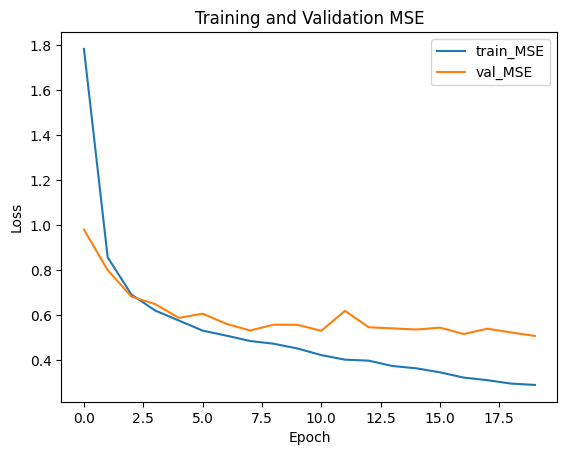

In [ ]:
import matplotlib.pyplot as plt

def plot_results(train_result, val_results, type_results):
  plt.title("Training and Validation " + type_results)
  plt.plot(train_result, label="train_" + type_results)
  plt.plot(val_results, label="val_" + type_results)
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

plot_results(train_losses, valid_losses, "MSE")

In [ ]:
print(test_loss)

0.5412159911964252


In [ ]:
print(valid_losses)

[0.9799969891707102, 0.8008563121159872, 0.6832076782981555, 0.6497633258501689, 0.5886475195487341, 0.6074218004941939, 0.5624175270398457, 0.5328544278939564, 0.5585736632347107, 0.5580920030673345, 0.5313790986935297, 0.6199915533264478, 0.547093023856481, 0.5422993699709574, 0.5372011239329973, 0.5453905637065569, 0.5172130912542343, 0.5406535863876343, 0.5243329356114069, 0.508660734941562]
